In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_TNG100 = pd.read_csv("../../dataset_raw/HSC_TNG100/label.csv")
df_TNG50 = pd.read_csv("../../dataset_raw/HSC_TNG50/label.csv")
df_HSC = pd.read_csv("../../dataset_raw/HSC/label.csv")

print(np.sum(df_TNG100["petro_half_light"].isnull())/len(df_TNG100))
print(np.sum(df_TNG50["petro_half_light"].isnull())/len(df_TNG50))
print(np.sum(df_HSC["petro_half_light"].isnull())/len(df_HSC))

df = df_TNG100

0.12381402723767447
0.08468085106382979
0.2817192200708779


[72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91.]


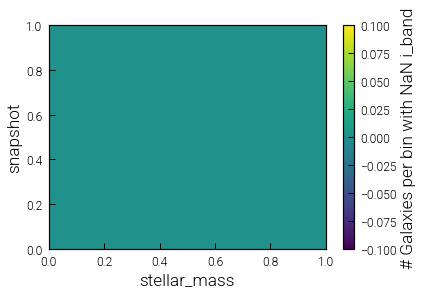

In [3]:
#plt.scatter(np.log10(df["stellar_mass"]), df["i_band_mag_dust_apparent"], s=1)
nan = np.isnan(df["i_band_mag_dust_apparent"])
plt.hist2d(np.log10(df["stellar_mass"])[nan], df["snapshot_id"][nan], bins=91-78)
#plt.hist(np.log10(df["stellar_mass"]), alpha = 0.5)
plt.colorbar(label="# Galaxies per bin with NaN i_band")
plt.xlabel("stellar_mass")
plt.ylabel("snapshot")

print(np.unique(df["snapshot_id"]))

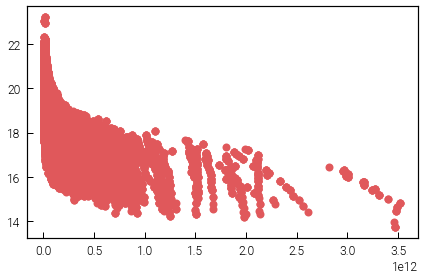

In [4]:
plt.scatter(df["stellar_mass"], df["i_band_mag_dust_apparent"])

Text(0, 0.5, 'half_mass_rad_physical')

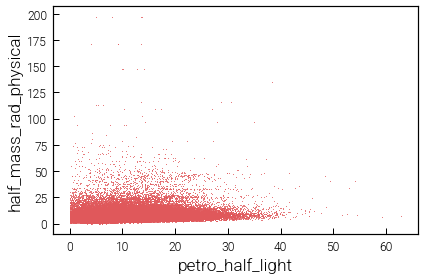

In [5]:
plt.scatter(df["petro_half_light"], df["half_mass_rad_physical"], s=1)
plt.xlabel("petro_half_light")
plt.ylabel("half_mass_rad_physical")

Text(0, 0.5, 'half_mass_rad_physical')

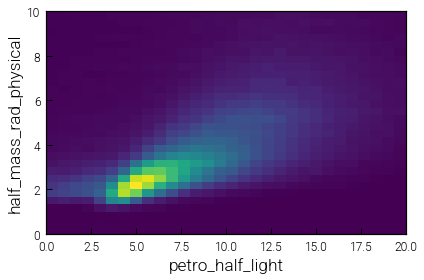

In [6]:
plt.hist2d(df["petro_half_light"], df["half_mass_rad_physical"], range=[[0,20],[0,10]], bins=30)
plt.xlabel("petro_half_light")
plt.ylabel("half_mass_rad_physical")

In [7]:
from astropy.io import fits
import matplotlib.pyplot as plt

def load_image(filename):
    
    def get_central_crop(img, num_pixel=20):
        size = img.shape[0]
        center_coordinate = size//2
        upper = center_coordinate + num_pixel//2
        lower = center_coordinate - num_pixel//2
    
        return img[lower:upper, lower:upper]
    
    def stretch(x):
        x[x<=0] = np.nan
        x = np.log10(x)
        x[x<-7] = np.nan
        
        a_min = np.nanmedian(x)
        a_max = np.nanquantile(get_central_crop(x), 0.99)
        
        x = np.nan_to_num(x, nan=a_min, posinf=a_min, neginf=a_min)
        x = np.clip(x, a_min, a_max)
        
        x -= a_min
        x /= (a_max - a_min)
        
        return np.array(x*(2**8 - 1), dtype=np.uint8)
    
    with fits.open(filename) as hdul:
            
        G = hdul['G'].data
        R = hdul['R'].data
        I = hdul['I'].data
            
    G = stretch(G)
    R = stretch(R)
    I = stretch(I)

    return np.concatenate((I[...,np.newaxis],R[...,np.newaxis],G[...,np.newaxis]),axis=2)



/u/leisert/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less


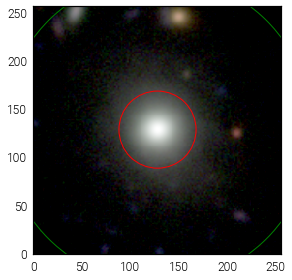

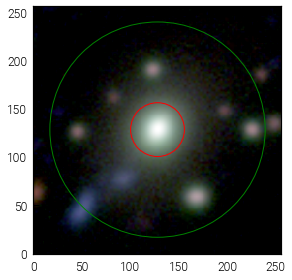

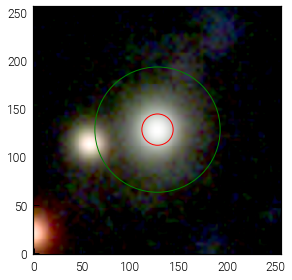

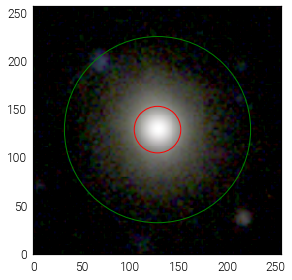

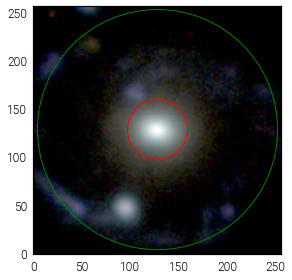

In [8]:
nan_mask = df["petro_half_light"].isnull()
filenames = df['image_path'][nan_mask].to_numpy()
petro = df['petro_90_light'][nan_mask].to_numpy()

for i in range(5):
    img = load_image("../." + filenames[i])

    fig, ax = plt.subplots()
    circle_rad = plt.Circle((img.shape[0]//2, img.shape[0]//2), petro[i], color='r', fill=False, linewidth=1)
    circle_cut = plt.Circle((img.shape[0]//2, img.shape[0]//2), petro[i]*4, color='g', fill=False, linewidth=1)
    ax.imshow(img)
    ax.add_patch(circle_rad)
    ax.add_patch(circle_cut)

    fig.savefig('../../temp/nan_petrosian_half_' + str(i) + '.png')
    plt.show()


/u/leisert/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less


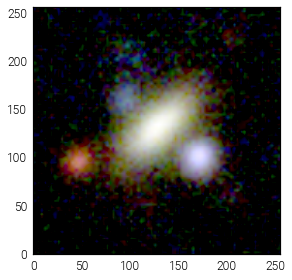

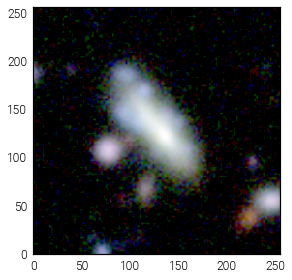

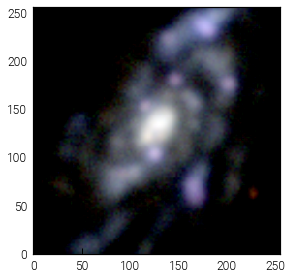

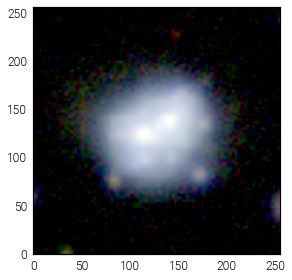

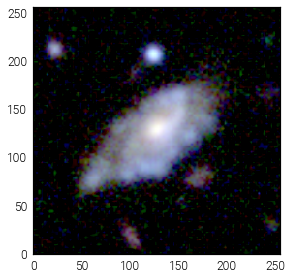

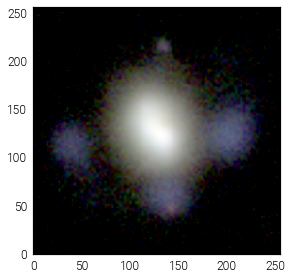

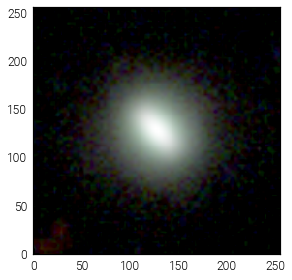

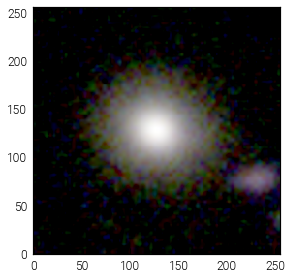

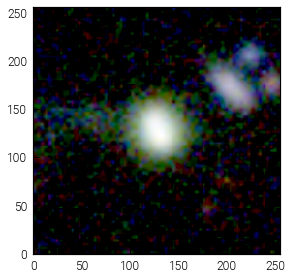

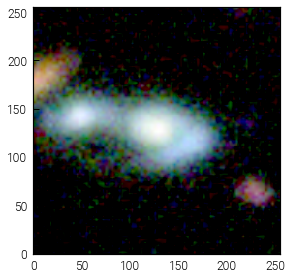

In [9]:
nan_mask = df["petro_half_light"].isnull()
filenames = df['image_path'][~nan_mask].to_numpy()

for i in range(10):
    img = load_image("../." + filenames[i])
    plt.imshow(img)
    plt.show()

Check if the fitted petro radii are comparable between Observations and Simulations

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2020.02/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2020.02/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2020.02/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2020.02/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2020.02/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/

(0.0, 80.0)

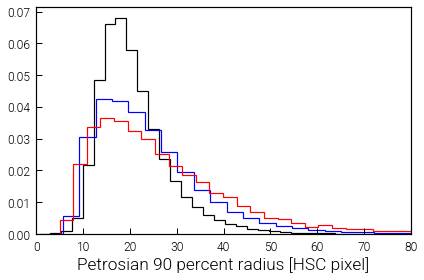

In [15]:
import matplotlib.pyplot as plt
plt.hist(df_HSC["petro_90_light"], bins=50, density=True, histtype='step', edgecolor='black', linewidth=1.2)
plt.hist(df_TNG100["petro_90_light"], bins=50, density=True, histtype='step', edgecolor='blue', linewidth=1.2)
plt.hist(df_TNG50["petro_90_light"], bins=50, density=True, histtype='step', edgecolor='red', linewidth=1.2)

max_y = 0.07
plt.plot([np.median(df_HSC["petro_90_light"])]*2, [0, max_y], 'k--')
plt.plot([np.median(df_TNG50["petro_90_light"])]*2, [0, max_y], 'r--')
plt.plot([np.median(df_TNG100["petro_90_light"])]*2, [0, max_y], 'b--')

plt.xlabel('Petrosian 90 percent radius [HSC pixel]')
plt.xlim(0, 80)

Also check the petro after matching the Simulation to Observations

(0.0, 80.0)

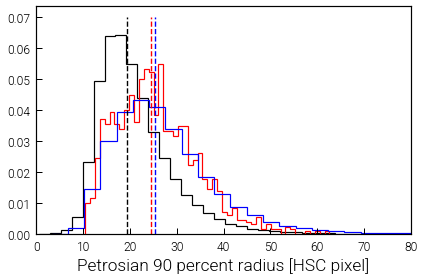

In [13]:
import pandas as pd
import numpy as np

df = pd.read_csv("../../dataset/m_train.csv")
HSC_mask = df["dataset"] == 'HSC'
TNG50_mask = df["dataset"] == 'HSC_TNG50'
TNG100_mask = df["dataset"] == 'HSC_TNG100'
HSC_petro = df["petro_90_light"][HSC_mask]
TNG50_petro = df["petro_90_light"][TNG50_mask]
TNG100_petro = df["petro_90_light"][TNG100_mask]

plt.hist(HSC_petro, bins=50, density=True, histtype='step', edgecolor='black', linewidth=1.2)
plt.hist(TNG50_petro, bins=50, density=True, histtype='step', edgecolor='red', linewidth=1.2)
plt.hist(TNG100_petro, bins=50, density=True, histtype='step', edgecolor='blue', linewidth=1.2)

max_y = 0.07
plt.plot([np.median(HSC_petro)]*2, [0, max_y], 'k--')
plt.plot([np.median(TNG50_petro)]*2, [0, max_y], 'r--')
plt.plot([np.median(TNG100_petro)]*2, [0, max_y], 'b--')

plt.xlabel('Petrosian 90 percent radius [HSC pixel]')
plt.xlim(0, 80)

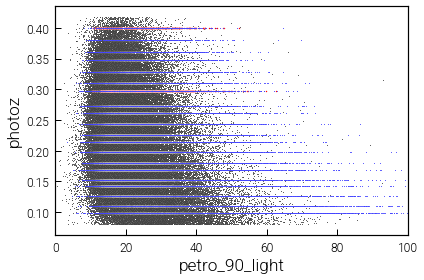

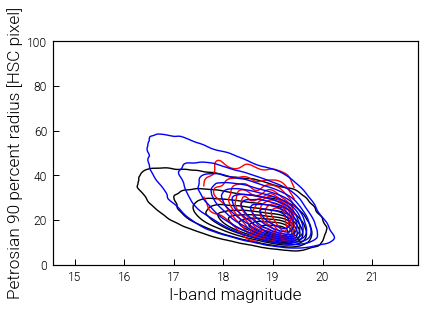

In [28]:
import seaborn as sns

plt.xlim(0, 100)
sns.scatterplot(df[HSC_mask], x='petro_90_light', y='photoz', s=1, color="k")
sns.scatterplot(df[TNG50_mask], x='petro_90_light', y='z', s=2, color="r")
sns.scatterplot(df[TNG100_mask], x='petro_90_light', y='z', s=1, color="b")
plt.show()

#sns.scatterplot(df[HSC_mask], x='petro_90_light', y='i_cmodel_mag_ge', s=1, color="r")
#sns.scatterplot(df[TNG_mask], x='petro_90_light', y='i_band_mag_dust_apparent', s=1, color="b")
#plt.show()

plt.ylim(0, 100)
sns.kdeplot(df[HSC_mask], y='petro_90_light', x='i_cmodel_mag_ge', color="k", cut=0)
sns.kdeplot(df[TNG50_mask], y='petro_90_light', x='i_band_mag_dust_apparent', color="r", cut=0)
sns.kdeplot(df[TNG100_mask], y='petro_90_light', x='i_band_mag_dust_apparent', color="b", cut=0)
plt.xlabel('I-band magnitude')
plt.ylabel('Petrosian 90 percent radius [HSC pixel]')
plt.show()